In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams['figure.figsize'] = (10,6)

!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

#load the data
data = pd.read_csv('data.csv')
print(data.head(5))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


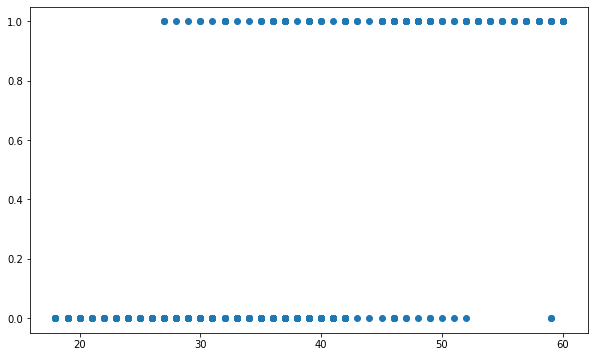

In [29]:
#visaulising the data
plt.scatter(data.Age,data.Purchased)
plt.show()

#dividing the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(data.Age,data.Purchased,test_size=0.20)


In [37]:
#creating logistic regression model
#helper function to normalize data
def normalize(X):
  return X - X.mean()

#method to make predictions
def predict(X,w0,w1):
  return np.array([1/(1+ exp(-1*w0 + -1*w1*x)) for x in X])
  

#method to train the model
def logistic_regression(X,Y):
  X = normalize(X)
  w0=0
  w1=0
  A = 0.001
  iterations = 150

  for i in range(iterations):
    y_pred = predict(X,w0,w1)
    D_w0 = -1 * sum((Y-y_pred) * y_pred * (1-y_pred))
    D_w1 = -1 * sum((Y-y_pred) * y_pred * (1-y_pred) * X)
    w0 = w0 - A * D_w0
    w1 = w1 - A * D_w1
  
  return w0,w1  

In [38]:
w0,w1 = logistic_regression(X_train,Y_train)
print(w0,w1)

-0.6871671096180906 0.16674658592723643


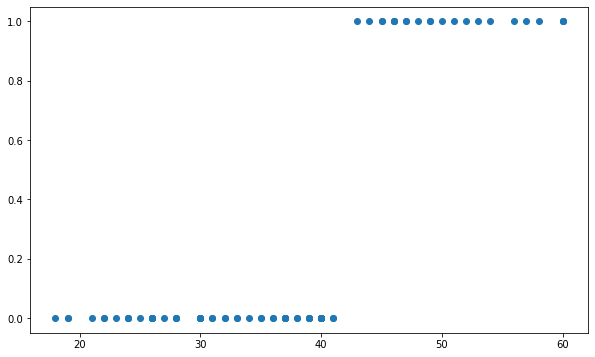

In [39]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm,w0,w1)
y_pred = [1 if y>=0.5 else 0 for y in y_pred]
plt.scatter(X_test,y_pred)
plt.show()

In [40]:
#finding the accuracy of the result
accuracy = 0
for i in range(len(y_pred)):
  if(y_pred[i]==Y_test.iloc[i]):
    accuracy +=1

print(f'the accuracy for this model is: {accuracy/len(y_pred)}')

the accuracy for this model is: 0.8625


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


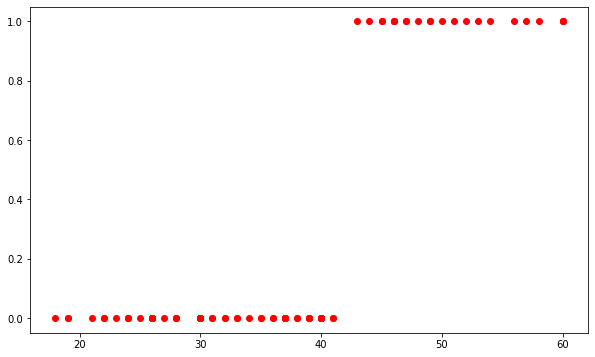

accuracy= 0.8625


In [41]:
#checking the predictions from sklearn library
from sklearn.linear_model import LogisticRegression

#creating an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))
plt.clf()
plt.scatter(X_test,y_pred_sk,c='r')
plt.show()

#accuracy
print(f'accuracy= { lr_model.score(X_test.values.reshape(-1,1),Y_test.values.reshape(-1,1))}')